Dataset: https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python

Direction: https://www.analyticsvidhya.com/blog/2021/01/in-depth-intuition-of-k-means-clustering-algorithm-in-machine-learning/

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [72]:
path = "/Users/matthewmacrides/Python and R/Github/Mall Customer Segmentation - Clustering/"
df = pd.read_csv(path + 'Customers.csv', sep=',', decimal='.')
df.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Spending Score: Score assigned by the mall based on customer behavior and spending nature

Let's create a clustering analysis to see what are target customers are. As you see, the data is limited but we will stiill try to find distinct clusters.

In [62]:
X = df.iloc[:, [3, 4]].values

In [64]:
k_values = range(1, 11)
wcss = [] 
for k in k_values: 
    kmeans = KMeans(n_clusters = k, n_init = 10, init = 'k-means++', random_state = 42)
    kmeans.fit(X) 
    wcss.append(kmeans.inertia_)

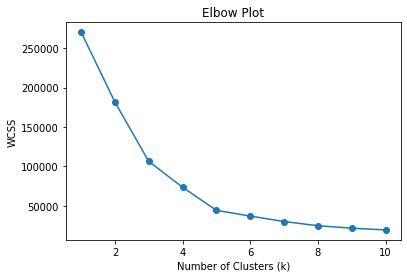

In [65]:
# Plot the elbow curve
plt.plot(k_values, wcss, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Plot')
plt.show()

In [70]:
kmeans = KMeans(n_clusters = 5, n_init = 10, init = "k-means++", random_state = 42)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
y_kmeans

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4], dtype=int32)

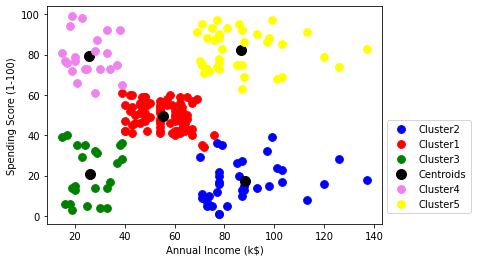

In [73]:
# Visualising the clusters
plt.scatter( X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 60, c = 'blue', label = 'Cluster2')
plt.scatter( X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 60, c = 'red', label = 'Cluster1') 
plt.scatter( X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 60, c = 'green', label = 'Cluster3') 
plt.scatter( kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'black', label = 'Centroids')
plt.scatter( X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 60, c = 'violet', label = 'Cluster4') 
plt.scatter( X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 60, c = 'yellow', label = 'Cluster5') 
plt.xlabel('Annual Income (k$)') 
plt.ylabel('Spending Score (1-100)') 
plt.legend(bbox_to_anchor=(1.0, 0.5))
plt.show()

Let's create personas for each cluster.
Cluster 1: Usual Shoppers. These people have the average annual income and average spending score. It is important to tailor towards them because they are most of your customers.

Cluster 2: Affluent but Uninterested. These people have lots of money but don't spend much time and money in the mall. Learn what niches they are into to potentially cater towards them.

Cluster 3: Lower class, low spender. Just as this name suggest, these people don't bring much value. Potentially create a niche for them.

Cluster 4: Lower class, high spenders. This group does not make much but spends a lot of timie shopping in the mall. Continue to tailor towards them to ensure they don't drop to cluster 3.

Cluster 5: Affluentials and profit drivers. These people are your most profitable group. This along with cluster 1 should be your main priority in the mall.